In [26]:
def foda_classif(diret,key,target):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    from sklearn.preprocessing import LabelEncoder
    from sklearn import preprocessing
    from sklearn.ensemble import RandomForestClassifier
    
    data=pd.read_csv(diret)

    if data[target[0]].dtypes=='object':
        le = LabelEncoder()
        data[target] = le.fit_transform(data[target])
        print('-'*120)
        print(' ')
        print('Ajustando formato da variável Alvo')
        print(' ')
        print('Originalmente os valores eram: ')
        print(list(le.classes_))
        print(' ')
        print('E agora são: ')
        print(list(le.transform(le.classes_)))


    if data.shape[0]>50000:
        print('-'*115)
        print(' ')
        print('Dado o tamanho da base estamos fazendo uma amostra de tamanho:')
        data=data.sample(n=50000, random_state=1)
        print(data.shape)
        print(' ')

    print('-'*115)
    print(' ')
    print('Informações sobre os dados:')
    print(' ')
    print(data.info())
    print(' ')
    print('-'*115)
    c = (data.dtypes == 'object')
    categorical_data = list(c[c].index)

    n = (data.dtypes == 'int64')|(data.dtypes == 'float64')
    numerical_data = list(n[n].index)

    out=target+key

    i=0
    while i<len(out):
        if data[out[i]].dtypes=='object':
            categorical_data.remove(out[i])
        else:
            numerical_data.remove(out[i])
        i=i+1
    print(' ')
    print('Variáveis Categóricas: ')
    print(categorical_data)
    print(' ')
    print('Variáveis Numéricas: ')
    print(numerical_data)
    print(' ')
    i=0
    categorica=[]
    num=[]
    print('-'*115)
    print(' ')
    print('Análises das Variáveis Categóricas')
    print(' ')
    print('-'*115)
    print(' ')
    while i<len(categorical_data):
        print("Variável: "+categorical_data[i])
        if len(data[categorical_data[i]].unique())<=20:
            categorica.append(categorical_data[i])
            print(data[categorical_data[i]].fillna('NaN').unique())
            print(' ')
            print(data[[categorical_data[i],target[0]]].fillna('NaN').groupby(categorical_data[i]).agg(['count','sum','mean']))
            print(' ')
            fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
            data[categorical_data[i]].value_counts().plot.pie(autopct='%1.1f%%',ax=axis0)
            ax = sns.countplot(x = categorical_data[i],hue = target[0],data=data.fillna('NaN'))
            plt.show()
            print('-'*115)
        else:
            print("Variável com {} valores distintos, recomendamos algum tratamento nesta informação para redução de classes.".format(len(data[categorical_data[i]].unique())))
            print(' ')
            print('-'*115)
        print(' ')    
        i=i+1
    i=0  
    print('Análises das Variáveis Numéricas')
    print(' ')
    print('-'*115)
    print(' ')
    ordinal=[]
    continua=[]
    while i<len(numerical_data):
        print("Variável: "+numerical_data[i])
        num.append(numerical_data[i])
        if len(data[numerical_data[i]].unique())<=6 and data[numerical_data[i]].dtypes == 'int64':
            ordinal.append(numerical_data[i])
            print(data[numerical_data[i]].unique())
            print(' ')
            print(data[[numerical_data[i],target[0]]].groupby(numerical_data[i]).agg(['count','sum','mean']))
            print(' ')
            fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
            data[numerical_data[i]].value_counts().plot.pie(autopct='%1.1f%%',ax=axis0)      
            ax = sns.countplot(x = numerical_data[i],hue = target[0],data=data.fillna(data.mean()))
            plt.show()
            ax =  sns.violinplot(x=target[0], y=numerical_data[i], data=data.fillna(data.mean()))
            plt.show()
            print('-'*115)
        else:
            continua.append(numerical_data[i])
            xis=data[numerical_data[i]].fillna(data[numerical_data[i]].mean())
            ax = sns.distplot(xis)
            plt.show()
            print(' ')
            print('Média: {}'.format(str(data[numerical_data[i]].fillna(data[numerical_data[i]].mean()).mean())))
            print('DesvioPadrão: {}'.format(str(data[numerical_data[i]].fillna(data[numerical_data[i]].mean()).std())))
            print(' ')
            t=0
            x={}
            while t < len(data[target[0]].unique()):
                x[t]=data[data[target[0]]==data[target[0]].unique()[t]]
                sns.distplot(a=x[t][numerical_data[i]].fillna(x[t][numerical_data[i]].mean()), label=str(data[target[0]].unique()[t]), kde=True)
                t=t+1
            plt.legend()
            plt.show()
            t=0
            while t < len(data[target[0]].unique()):
                print('Média (Alvo = {}): {}'.format(str(data[target[0]].unique()[t]),str(x[t][numerical_data[i]].fillna(x[t][numerical_data[i]].mean()).mean())))
                print('DesvioPadrão (Alvo = {}): {}'.format(str(data[target[0]].unique()[t]),str(x[t][numerical_data[i]].fillna(x[t][numerical_data[i]].mean()).std())))
                print(' ')
                t=t+1
            print(' ')
            ax =  sns.violinplot(x=target[0], y=numerical_data[i], data=data.fillna(data.mean()))
            plt.show()
            print('-'*115)
            print(' ')
            plt.show()
        i=i+1
    print('Análise das Variáveis Conjuntas')
    print(' ')
    print('-'*115)
    print(' ')
    data=pd.read_csv(diret)
    if data.shape[0]>10000:
        data=data.sample(n=10000, random_state=1)
    print('Matriz de Correlação')
    fig = plt.figure(figsize=(20,20))
    sns.heatmap(data[continua].corr(), annot=True)
    plt.show()
    print(' ')
    print('-'*115)
    print(' ')
    g = sns.PairGrid(data[continua].fillna(data[continua].mean()))
    g.map_diag(plt.hist)
    g.map_offdiag(plt.scatter)
    plt.show()
    print(' ')
    print('-'*115)
    cont=continua+target
    print(' ')
    g = sns.pairplot(data[cont].fillna(data[cont].mean()),vars=cont[0:-1], hue=cont[-1])
    g.map_diag(plt.hist)
    g.map_offdiag(plt.scatter)
    g.add_legend()
    plt.show()
    print(' ')
    print('-'*115)
    print(' ')
    print('Importância das Variáveis')
    print(' ')
    print('-'*115)
    print(' ')
    vari=categorica+numerical_data
    data[categorica].head()
    label_data = data.copy()
    label_encoder = LabelEncoder()
    col_categorica=[]
    for col in categorica:
        label_data[col] = label_encoder.fit_transform(data[col].fillna('NaN'))
    rforest_checker = RandomForestClassifier(random_state = 0)
    rforest_checker.fit(label_data[categorica+numerical_data].fillna(label_data[categorica+numerical_data].mean()), data[target])
    importances_df = pd.DataFrame(rforest_checker.feature_importances_, columns=['Feature_Importance'],index=label_data[categorica+numerical_data].fillna(label_data[categorica+numerical_data].mean()).columns)
    importances_df.sort_values(by=['Feature_Importance'], ascending=False, inplace=True)
    fig = plt.figure(figsize=(20,20))
    sns.barplot(x=importances_df.columns[0],y=importances_df.index,data=importances_df)
    plt.show()
    data=pd.read_csv(diret)

In [27]:
diretorio='train.csv'
chave=['PassengerId','Name']
alvo=['Survived']

-------------------------------------------------------------------------------------------------------------------
 
Informações sobre os dados:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
 
-------------------------------------------------------------------------------------------------------------------
 
Variáveis Categóricas: 
['Sex', 'Ticket', 'Cabin', 'Embarked']
 
Variáveis Numéricas: 
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
 
---------

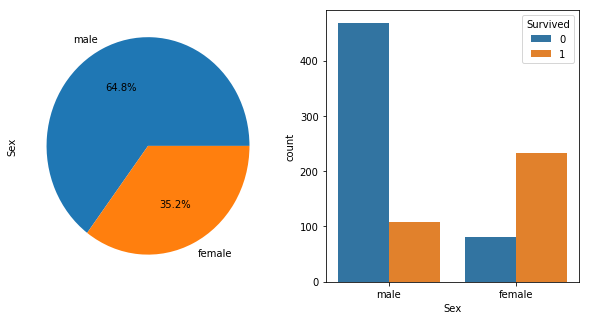

-------------------------------------------------------------------------------------------------------------------
 
Variável: Ticket
Variável com 681 valores distintos, recomendamos algum tratamento nesta informação para redução de classes.
 
-------------------------------------------------------------------------------------------------------------------
 
Variável: Cabin
Variável com 148 valores distintos, recomendamos algum tratamento nesta informação para redução de classes.
 
-------------------------------------------------------------------------------------------------------------------
 
Variável: Embarked
['S' 'C' 'Q' 'NaN']
 
         Survived               
            count  sum      mean
Embarked                        
C             168   93  0.553571
NaN             2    2  1.000000
Q              77   30  0.389610
S             644  217  0.336957
 


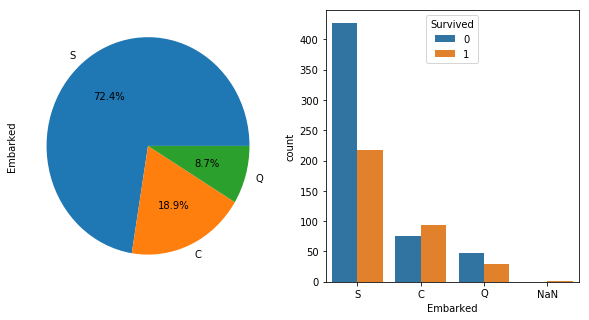

-------------------------------------------------------------------------------------------------------------------
 
Análises das Variáveis Numéricas
 
-------------------------------------------------------------------------------------------------------------------
 
Variável: Pclass
[3 1 2]
 
       Survived               
          count  sum      mean
Pclass                        
1           216  136  0.629630
2           184   87  0.472826
3           491  119  0.242363
 


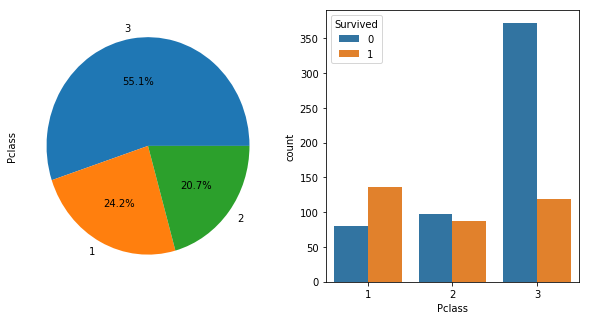

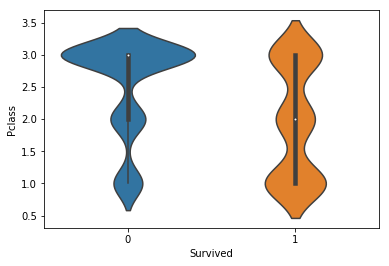

-------------------------------------------------------------------------------------------------------------------
Variável: Age


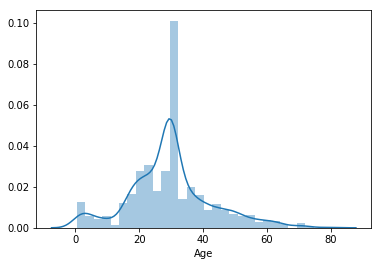

 
Média: 29.699117647058763
DesvioPadrão: 13.002015226002884
 


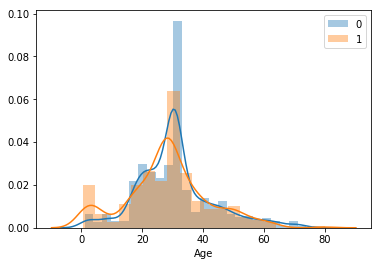

Média (Alvo = 0): 30.62617924528295
DesvioPadrão (Alvo = 0): 12.451291919190268
 
Média (Alvo = 1): 28.3436896551724
DesvioPadrão (Alvo = 1): 13.76387052482873
 
 


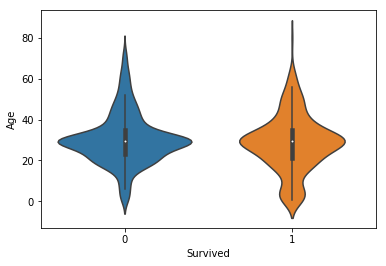

-------------------------------------------------------------------------------------------------------------------
 
Variável: SibSp


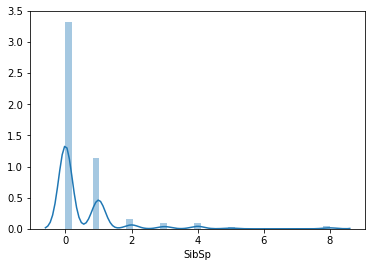

 
Média: 0.5230078563411896
DesvioPadrão: 1.1027434322934275
 


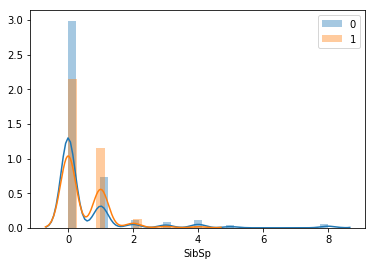

Média (Alvo = 0): 0.5537340619307832
DesvioPadrão (Alvo = 0): 1.2883991404864699
 
Média (Alvo = 1): 0.47368421052631576
DesvioPadrão (Alvo = 1): 0.7086875190740344
 
 


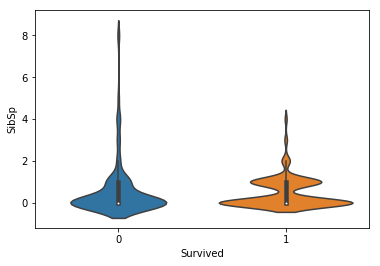

-------------------------------------------------------------------------------------------------------------------
 
Variável: Parch


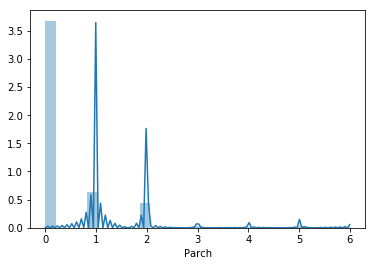

 
Média: 0.38159371492704824
DesvioPadrão: 0.8060572211299559
 


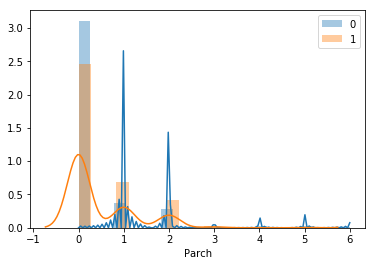

Média (Alvo = 0): 0.3296903460837887
DesvioPadrão (Alvo = 0): 0.8231660076814696
 
Média (Alvo = 1): 0.4649122807017544
DesvioPadrão (Alvo = 1): 0.7717120156496242
 
 


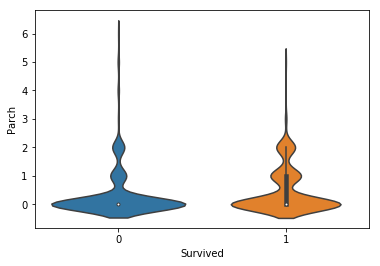

-------------------------------------------------------------------------------------------------------------------
 
Variável: Fare


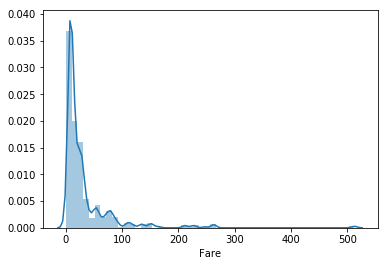

 
Média: 32.2042079685746
DesvioPadrão: 49.693428597180905
 


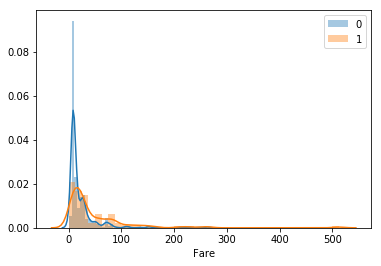

Média (Alvo = 0): 22.117886885245877
DesvioPadrão (Alvo = 0): 31.388206530563984
 
Média (Alvo = 1): 48.39540760233917
DesvioPadrão (Alvo = 1): 66.59699811829472
 
 


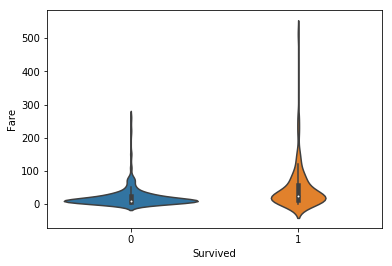

-------------------------------------------------------------------------------------------------------------------
 
Análise das Variáveis Conjuntas
 
-------------------------------------------------------------------------------------------------------------------
 
Matriz de Correlação


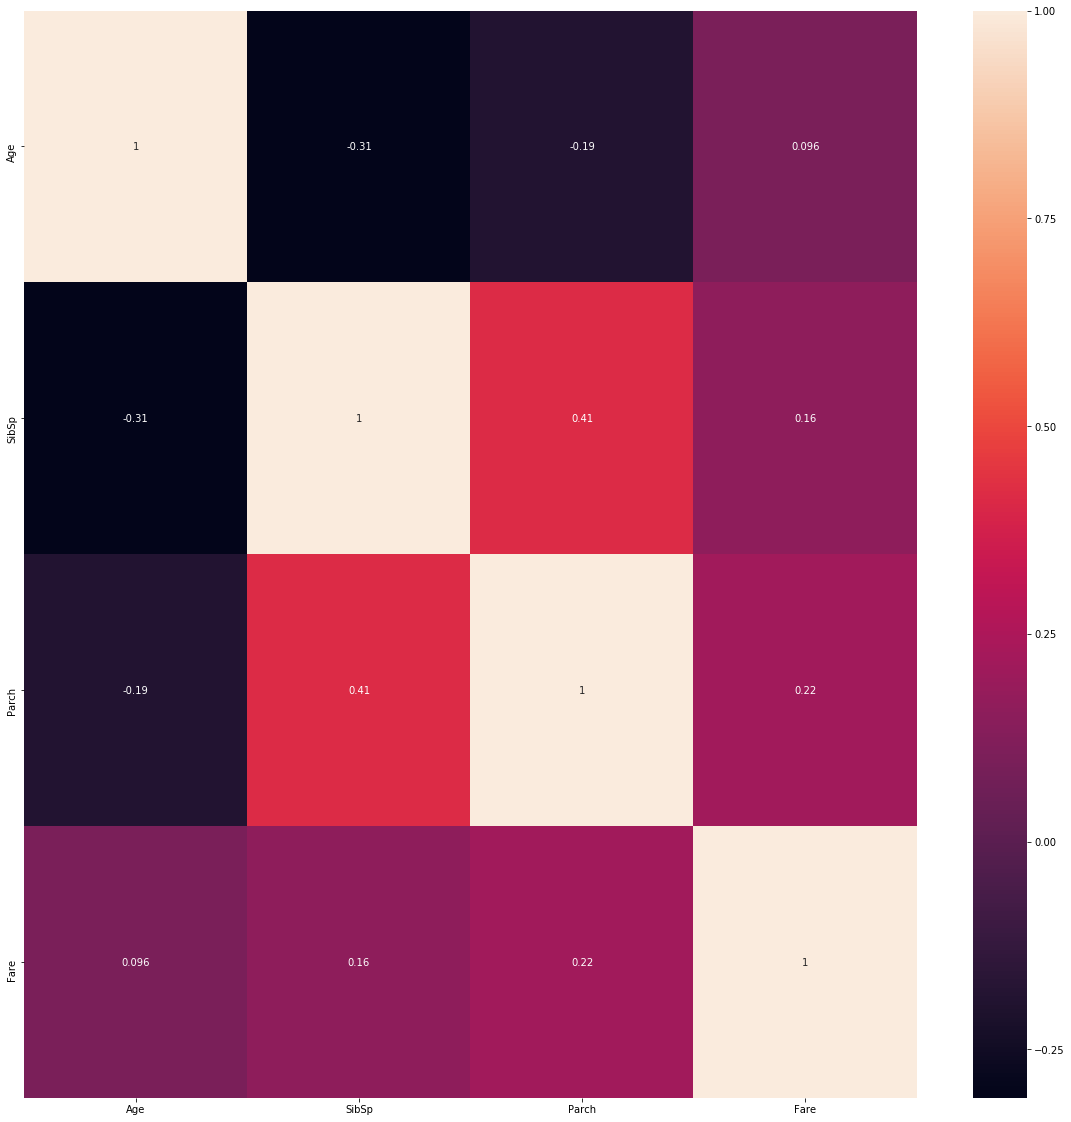

 
-------------------------------------------------------------------------------------------------------------------
 


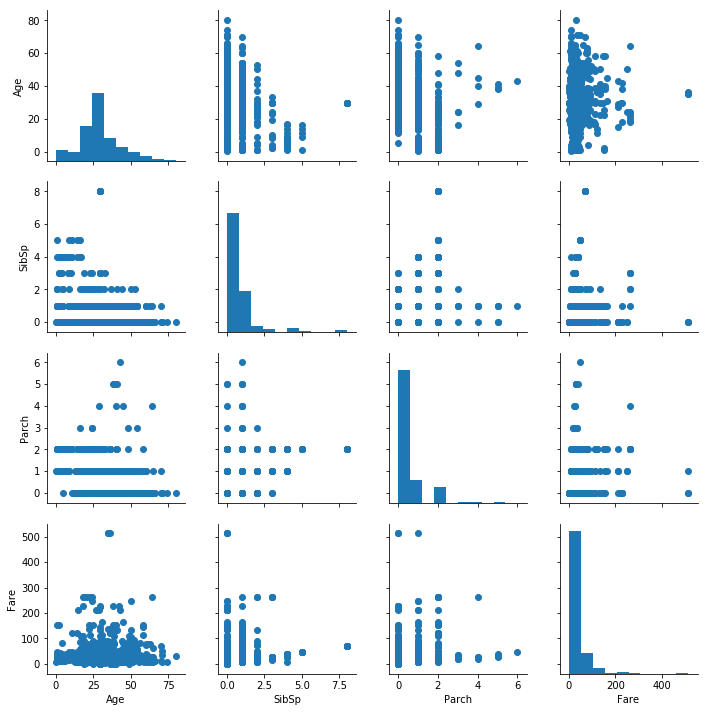

 
-------------------------------------------------------------------------------------------------------------------
 


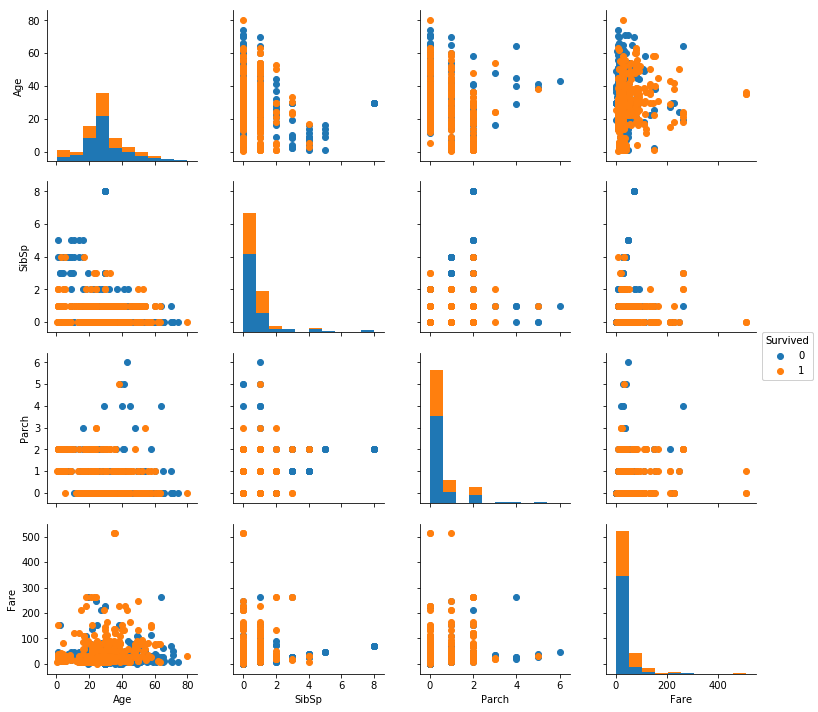

 
-------------------------------------------------------------------------------------------------------------------
 
Importância das Variáveis
 
-------------------------------------------------------------------------------------------------------------------
 


/Users/rafaeladolfo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:188: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


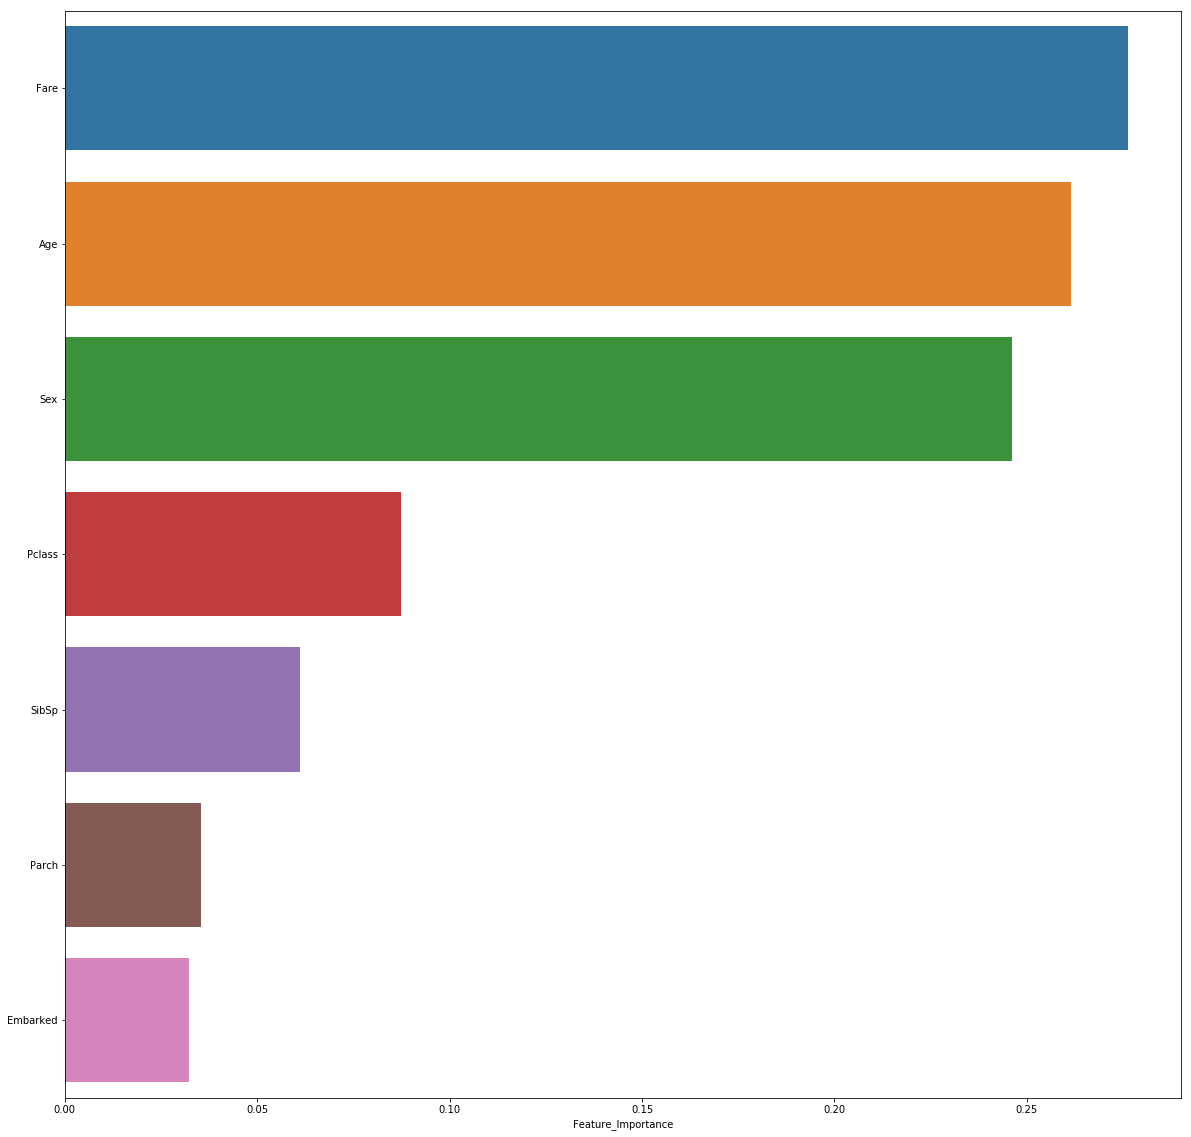

In [28]:
foda_classif(diretorio,chave,alvo)